Pruebas - Cuantización

#####Alumna Farinazzo Analia 24994389@ifts24.edu.ar

In [2]:
#Importo las librerías más comunes para el manejo de imágenes.  Puede que no todas tengan uso posterior.

import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from PIL import Image

In [3]:
# Para poder probar las sentencias de Muestreo, igualmente tengo que cargar una imagen.
# Utilizaremos la opción de tomarla desde un drive propio.


# Tomar y mostrar una imagen disponible en un drive.

# Conecto el Drive donde tengo alojada la imagen
from google.colab import drive
import os

# Monto el drive (conecto el drive con el colab)
drive.mount("/content/drive/", force_remount=True)
#fuerzo el remount por si ejecuto varias veces y ya estaba montado.

# Cambio el directorio para posicionarme donde están las imágenes.
os.chdir('/content/drive/MyDrive/EntregaTPProcesamientoImg/ImagenesPrueba/')

Mounted at /content/drive/


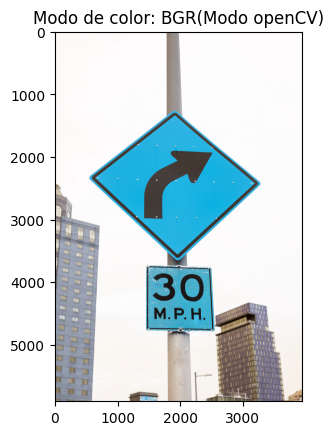

In [4]:
#Tomo y "leo" la imagen elegida desde el drive.  Decido continuar con la de la ceñal de tránsito con la ciudad de fondo.
city1 = imread('Señal_Ciudad.jpg')  ### Ojo!  Es sensible de Mayúsculas y Minúsculas (colab corre en un entorno unix)

#La mostramos con los colores invertidos porque plt utiliza RGB y cv2 BGR
plt.title("Modo de color: BGR(Modo openCV)")
plt.imshow(city1)
plt.show()


El objetivo de la cuantización, es trabajando con la imagen en escala de grises, precisamente reducir la cantidad de grises visibles en la imagen.
Es similar al muestreo, pero en vez de trabajar sobre la composición a nivel de cantidad de pixeles, se trabaja en reducir la cantidad de grises.

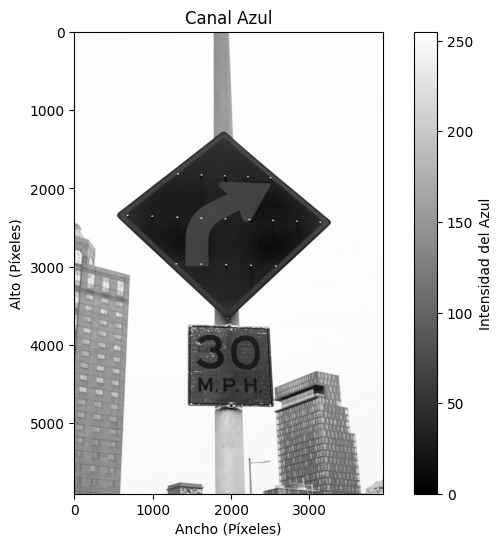

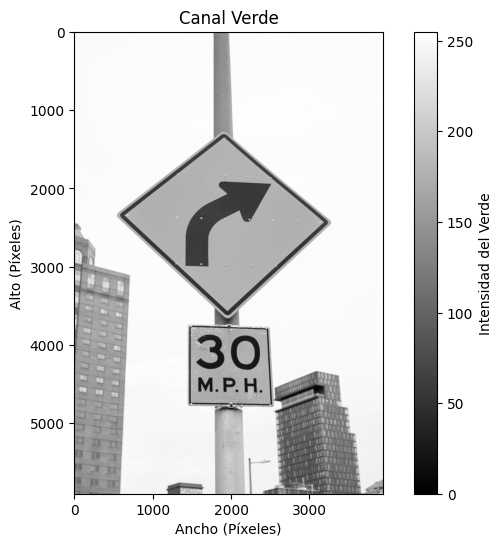

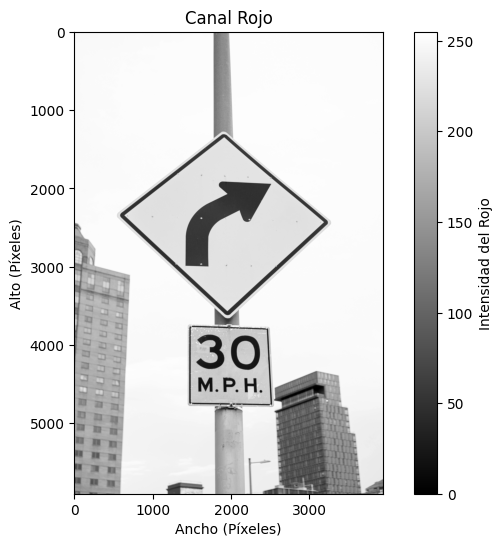

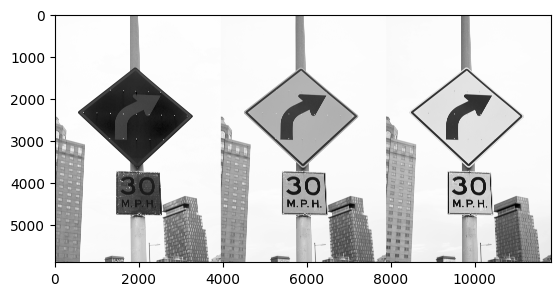

In [5]:
# Vamos a cuantizar los canales Verde y Rojo (Dados los valores obtenidos en el preprocesamiento, el azul no sería relevante).
# Extraer cada canal según el índice 0=Azul, 1=Verde, 2=Rojo

city_azul = city1[:, :, 0]
city_verde = city1[:, :, 1]
city_rojo = city1[:, :, 2]

# Podemos visualizar cada canal como una imagen en escala de grises

plt.figure(figsize=(8, 6))
plt.imshow(city_azul, cmap='gray')
plt.title('Canal Azul')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Azul')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(city_verde, cmap='gray')
plt.title('Canal Verde')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Verde')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(city_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.xlabel('Ancho (Píxeles)')
plt.ylabel('Alto (Píxeles)')
plt.colorbar(label='Intensidad del Rojo')
plt.show()

#O alinearlas a todas para una comparación más sencilla.

comp_canal = np.hstack((city_azul,city_verde,city_rojo))
plt.imshow(comp_canal, cmap='gray')
plt.show()



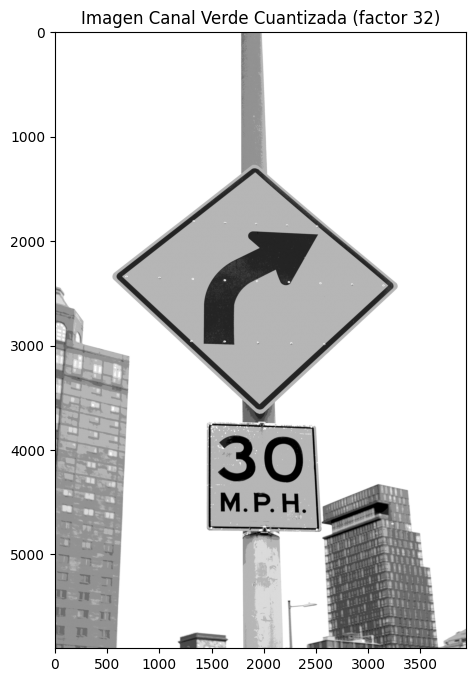

Esta imagen tiene 8 niveles de gris (original: 256)


In [6]:
#Igual que el downsampling, para cuantización se utiliza un factor de reducción.
#La idea es encontrar el mejor factor que nos permita reducir la información de la imagen,
#sin perder detalles, y obteniendo una imagen que nos facilite continuar segmentando

q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
fc = np.floor(city_verde/q)*q      # Agrupa valores en intervalos de tamaño q
fc = fc.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(fc, cmap='gray')
plt.title(f'Imagen Canal Verde Cuantizada (factor {q})')
plt.show()
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

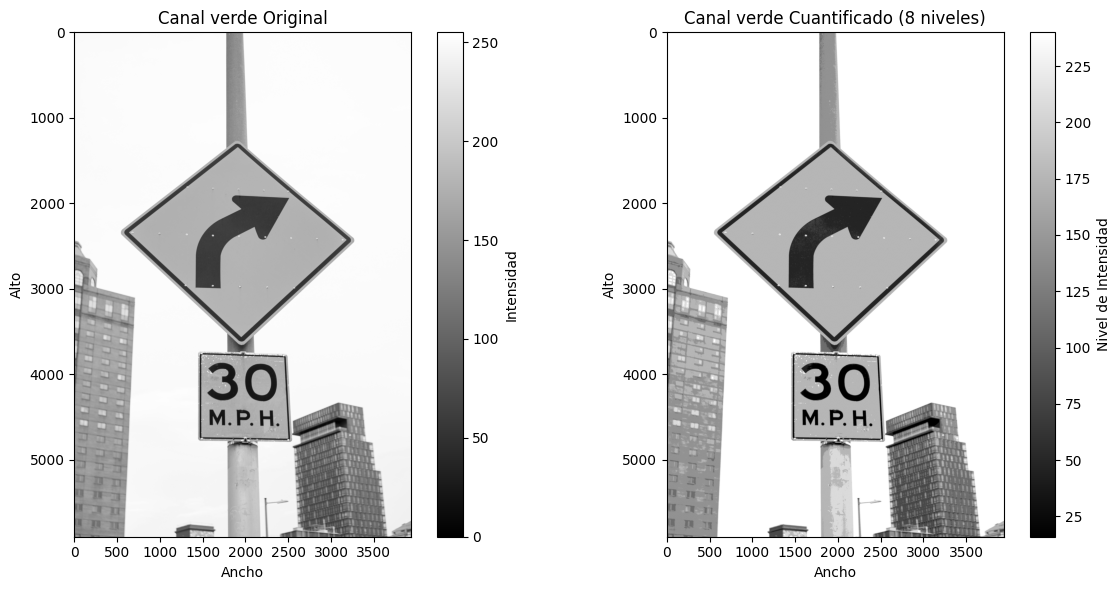

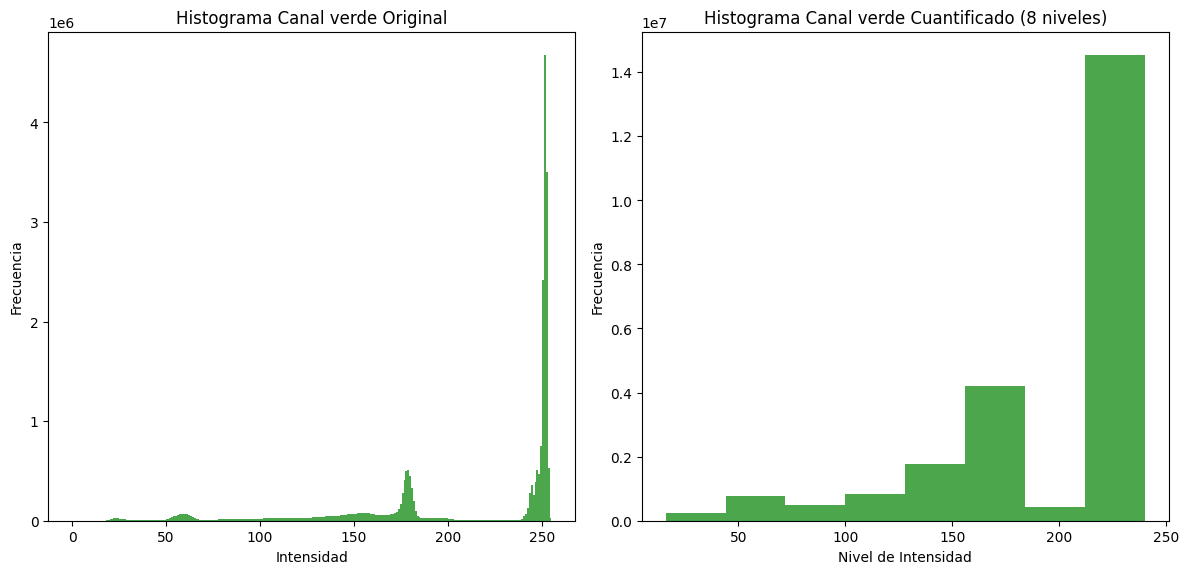

In [7]:
# 1. Definir el número de niveles de cuantización deseados
num_niveles = 8  # Puedes experimentar con diferentes valores

# 2. Realizar la cuantización lineal
# Calculamos el tamaño de cada "escalón" o rango de valores
paso = 256 // num_niveles

# 3. Creamos una nueva matriz para almacenar el canal verde cuantificado
canal_verde_cuantificado = np.zeros_like(city_verde)

# 4. Visualizar el canal verde original y el cuantificado
#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)

# Asignamos cada valor original al nivel cuantificado correspondiente
for i in range(num_niveles):
    lower_bound = i * paso
    upper_bound = (i + 1) * paso
    # Asignamos el valor medio del rango como el nuevo nivel
    nivel_valor = (lower_bound + upper_bound) // 2
    canal_verde_cuantificado[(city_verde >= lower_bound) & (city_verde < upper_bound)] = nivel_valor

# Para el último nivel (que podría no ser un rango completo si 256 no es divisible por num_niveles)
if 256 % num_niveles != 0:
    lower_bound = (num_niveles - 1) * paso
    canal_verde_cuantificado[city_verde >= lower_bound] = (lower_bound + 255) // 2

# 5. Visualizar el canal verde original y el cuantificado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(city_verde, cmap='gray')
plt.title('Canal verde Original')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.colorbar(label='Intensidad')

plt.subplot(1, 2, 2)
plt.imshow(canal_verde_cuantificado, cmap='gray')
plt.title(f'Canal verde Cuantificado ({num_niveles} niveles)')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.colorbar(label='Nivel de Intensidad')

plt.tight_layout()
plt.show()

# 5. Visualizar los histogramas para comparar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(city_verde.flatten(), bins=256, color='green', alpha=0.7)
plt.title('Histograma Canal verde Original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(canal_verde_cuantificado.flatten(), bins=num_niveles, color='green', alpha=0.7)
plt.title(f'Histograma Canal verde Cuantificado ({num_niveles} niveles)')
plt.xlabel('Nivel de Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

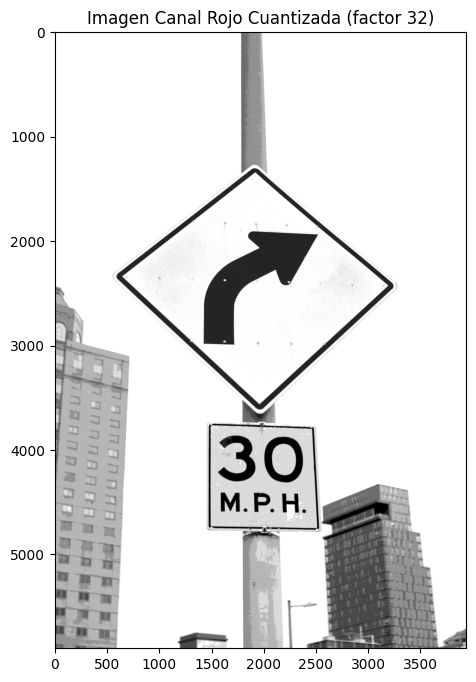

Esta imagen tiene 8 niveles de gris (original: 256)


In [8]:
# Divide por q, redondea hacia abajo y multiplica por q
fcr = np.floor(city_rojo/q)*q      # Agrupa valores en intervalos de tamaño q
fcr = fcr.astype(np.uint8)   # Convierte a enteros 0-255

# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(fcr, cmap='gray')
plt.title(f'Imagen Canal Rojo Cuantizada (factor {q})')
plt.show()
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

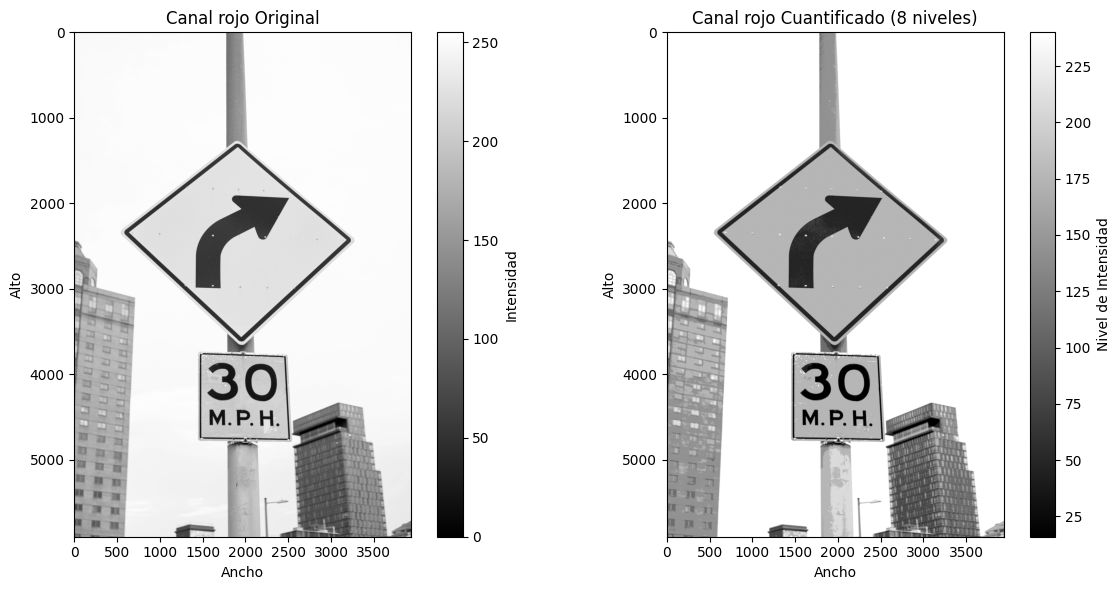

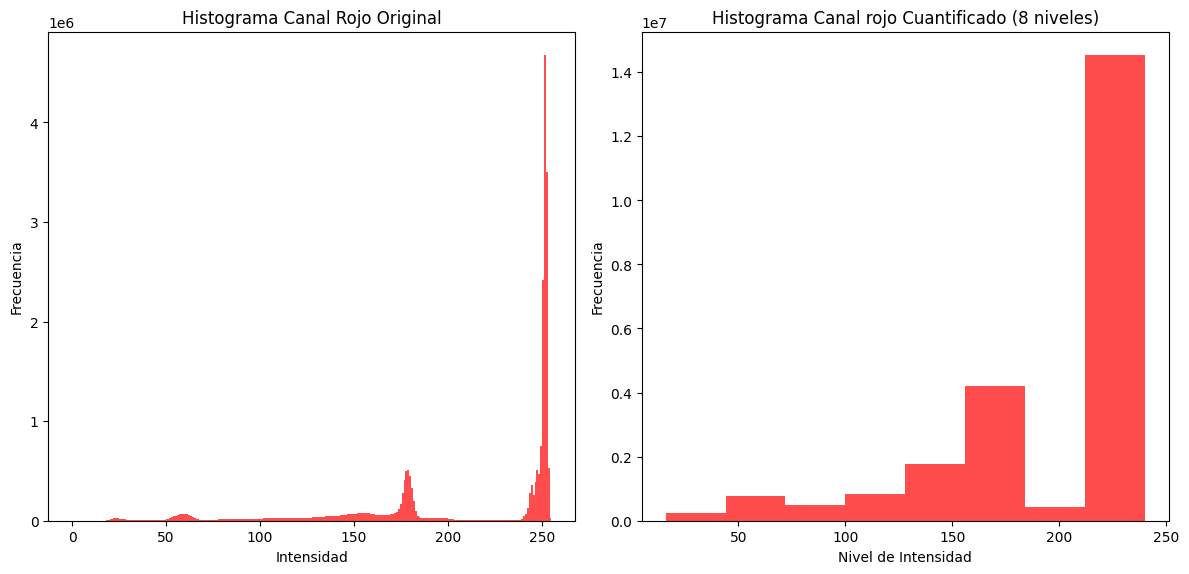

In [9]:
# 1. Definir el número de niveles de cuantización deseados
num_niveles = 8  # Puedes experimentar con diferentes valores

# 2. Realizar la cuantización lineal
# Calculamos el tamaño de cada "escalón" o rango de valores
paso = 256 // num_niveles

# 3. Creamos una nueva matriz para almacenar el canal verde cuantificado
canal_rojo_cuantificado = np.zeros_like(city_rojo)

# 4. Visualizar el canal rojo original y el cuantificado
#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)

# Asignamos cada valor original al nivel cuantificado correspondiente
for i in range(num_niveles):
    lower_bound = i * paso
    upper_bound = (i + 1) * paso
    # Asignamos el valor medio del rango como el nuevo nivel
    nivel_valor = (lower_bound + upper_bound) // 2
    canal_rojo_cuantificado[(city_rojo >= lower_bound) & (city_verde < upper_bound)] = nivel_valor

# Para el último nivel (que podría no ser un rango completo si 256 no es divisible por num_niveles)
if 256 % num_niveles != 0:
    lower_bound = (num_niveles - 1) * paso
    canal_rojo_cuantificado[city_rojo >= lower_bound] = (lower_bound + 255) // 2

# 5. Visualizar el canal verde original y el cuantificado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(city_rojo, cmap='gray')
plt.title('Canal rojo Original')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.colorbar(label='Intensidad')

plt.subplot(1, 2, 2)
plt.imshow(canal_verde_cuantificado, cmap='gray')
plt.title(f'Canal rojo Cuantificado ({num_niveles} niveles)')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.colorbar(label='Nivel de Intensidad')

plt.tight_layout()
plt.show()

# 5. Visualizar los histogramas para comparar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(city_verde.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Histograma Canal Rojo Original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(canal_verde_cuantificado.flatten(), bins=num_niveles, color='red', alpha=0.7)
plt.title(f'Histograma Canal rojo Cuantificado ({num_niveles} niveles)')
plt.xlabel('Nivel de Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()